
# Project Title: Chronic Disease in the U.S.

Group Member 1: Kevin Wood,
kevin.wood@utah.edu,
u0658811

Group Member 2: Jassy Ju,
jassy.ju@utah.edu
u0718404

## Background and Motivation

Health data is widely available information that contains information regarding different health conditions from various populations. As biomedical informatics students, we were both interested in measuring, comparing and depicting health datasets.
For this project, we will focus on exploring the U.S. Chronic Disease Indicators dataset.

## Project Objectives

The primary objective of this project will focus on geospatial analysis of the U.S. Chronic Disease Indicators dataset by diabetes, alcohol, tobacco, nutrition, physical activity and weight status. Aside from comparing the topics by each state, we plan to see if there are connections between the health conditions and information found from scraping online or from another public dataset.


## Data
Dataset we will be using is called U.S. Chronic Disease Indicators (CDI), a CSV file from http://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

## Ethical Consideration

The information we extract from the publicly available datasets will be valuable for anyone wanting to know more about chronic disease indicators across the states. Depending on the persona, the information we display could be informative or it may be used for other research purposes.

## Data Processing

We plan to use Python and it's supporting libraries and packages to clean and further process the data we import from the CDI dataset, while also scraping other supporting data sources when necessary. Below, we read in the dataset to a pandas dataframe to give better context to our proposal.

In [1]:
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='kwood16', api_key='u5jitQG8FvBkqpSoXjIs')

In [2]:
import pandas as pd
data = pd.read_csv('US_CDI.csv', low_memory = False)

In [3]:
data.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                      object
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
StratificationCategory3       object
Stratification3               object
GeoLocation                   object
ResponseID                    object
LocationID                     int64
TopicID                       object
QuestionID                    object
D

In [4]:
data.describe()

,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,519718.000000,519718.000000,3.503350e+05,311062.000000,311062.000000,519718.000000
mean,2013.141885,2013.162754,8.917742e+02,46.759401,58.991287,30.993144
std,1.777622,1.762672,1.833073e+04,77.492628,88.668862,17.723341
min,2001.000000,2001.000000,0.000000e+00,0.200000,0.420000,1.000000
25%,2012.000000,2012.000000,1.845500e+01,12.700000,18.900000,17.000000
50%,2013.000000,2013.000000,4.100000e+01,30.200000,43.800000,30.000000
75%,2015.000000,2015.000000,7.030000e+01,55.400000,70.400000,45.000000
max,2016.000000,2016.000000,2.600878e+06,1330.660000,2088.000000,78.000000


In [5]:
data.DataValue.isnull().groupby(data['Topic']).sum().astype(int).reset_index(name='NullCNT')

,Topic,NullCNT
0,Alcohol,8968
1,Arthritis,12844
2,Asthma,14325
3,Cancer,6033
4,Cardiovascular Disease,14604
5,Chronic Kidney Disease,1997
6,Chronic Obstructive Pulmonary Disease,25062
7,Diabetes,30127
8,Disability,600
9,Immunization,251


In [6]:
data.groupby('Topic').mean()

,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
Topic,,,,,,
Alcohol,2013.201570,2013.201570,43.326631,8.492928,12.442843,31.055604
Arthritis,2013.374716,2013.374716,36.630016,30.157477,43.597251,31.545816
Asthma,2013.174142,2013.174142,368.774039,31.374737,43.624873,31.114770
Cancer,2013.353663,2014.061698,881.422496,67.616579,77.122929,31.126941
Cardiovascular Disease,2012.658477,2012.658477,1327.057140,66.981051,81.234672,30.315410
Chronic Kidney Disease,2012.631706,2012.631706,720.707002,33.174245,41.138492,30.132876
Chronic Obstructive Pulmonary Disease,2012.985101,2012.985101,3074.420181,63.857687,78.264549,30.717639
Diabetes,2013.191446,2013.192827,838.749862,46.305193,60.812661,31.140234
Disability,2013.000000,2013.000000,37.017230,34.008404,40.024029,30.339623


As you can see, the dataset isn't perfect, with some data types not being entirely standardized. In light of this, we plan on extracting subsets of the data by topic to ensure the data values are correspond appropriately with the analysis we do on the dataset as a whole. We also will need to account for missingness within the dataset, but we've also chosen to focus on topics with higher fill rates (i.e. alcohol, nutrition). We'll have to try out different methods, but we've initially discussed using the mean to impute null values, or similar values for a given state if pertinent.

We also plan on scraping other data on the web, for example, this website containing the fast food restaurants per capita: https://www.thrillist.com/news/nation/states-with-most-fast-food-restaurants-datafiniti. We found other data on the web regarding alcohol prevalence that we would process using Beautiful Soup.

The values we see being the most valuable for our purposes will be topic, year end and start, question, state, and the data value itself. These values from the CDI data, along with those mentioned above will be the focus of our analysis.

## Exploratory Analysis

Our project will definitely need to utilize map visualizations, and we plan on trying to implement a geospatial plot as well as other standard plots and charts to better describe the dataset. We'd like to do some simple linear regressions on the data to start, and show those regressions with the ggplot library. It might be useful for us to try implementing some boxplots and to explore visualization capabilities using maps, as evidenced here: https://python-graph-gallery.com/.

## Analysis Methodology


Analysis of the CDI data will start with data profiling using basic pandas methods, and then expand into more and more complex analysis. We hope to tell the story of our data as it unfolded to us throughout our analysis using bar charts by topic and state, then expanding out to other datasets to explore other predictive values that are outside the scope of the CDI data. We hope to do this by starting with different variations of variables for linear regressions, then trying a more complex method that we might not have covered in class. Ultimately, we'd like to keep the number of variables small, but expand the data frame with new variables for exploratory purposes.

## Project Schedule


Our tentative project plan is shown below. We also plan to create a Trello board for task assignment and tracking while communicating via the class Slack and text.

###### Week of 2/25 - 3/3:
    -Procure initial dataset(s)
    -Setup project github repository
    -Submit Project Proposal and Google Form

###### Week of 3/4-3/10:
    -Clean CDI dataset
    -Look for other supplementary data for cross-examination and add to project repo
    -Assess missingness
    -Experiment with and decide on way(s) to account for missingness/bad data
    -Decide on 8-10 hypotheses


###### Week of 3/11-3/17 (Spring Break):
    -Explore dataset
    -Determine best linear regression variables
    -Test 4 hypotheses

###### Week of 3/18-3/24:
    -Test 4-5 more hypotheses
    -Attempt 2-3 classification methods
    -Create successful map visualization
    -Staff Review 1

###### Week of 3/25-3/31:
    -Add map visualization variations
    -Add supporting descriptive statistics as needed
    -Staff Review 2
    -Submit Milestone 1

###### Week of 4/1-4/7:
    -Test 3 newly learned analysis methods
    -Test 3 new variables or hypotheses

###### Week of 4/8-4/14:
    -Refine aesthetics, especially visualizations
    -Edit and expound on explanations
    -Final staff review

###### Week of 4/15-4/21:
    -Final edits and implement feedback from staff review
    -Submit Final Project


Daniel Wells and Amy Record 

Diabetes
type 2 or 1?

Add county-level analysis in addition to state-level

Get dataset for recreation areas (e.g. national and state parks) and cross-examine with existing dataset

Find more datasets to create analysis


In [7]:
data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,1,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,4,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,5,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
5,2016,2016,CA,California,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,6,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
6,2016,2016,CO,Colorado,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,8,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
7,2016,2016,CT,Connecticut,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,9,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
8,2016,2016,DE,Delaware,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,10,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
9,2016,2016,DC,District of Columbia,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,11,ALC,ALC2_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [8]:
data.describe

<bound method NDFrame.describe of         YearStart  YearEnd LocationAbbr          LocationDesc  \
0            2016     2016           US         United States   
1            2016     2016           AL               Alabama   
2            2016     2016           AK                Alaska   
3            2016     2016           AZ               Arizona   
4            2016     2016           AR              Arkansas   
5            2016     2016           CA            California   
6            2016     2016           CO              Colorado   
7            2016     2016           CT           Connecticut   
8            2016     2016           DE              Delaware   
9            2016     2016           DC  District of Columbia   
10           2016     2016           FL               Florida   
11           2016     2016           GA               Georgia   
12           2016     2016           HI                Hawaii   
13           2016     2016           ID                 

In [9]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [10]:
data['StratificationCategory2'].unique()

array([nan, ' '], dtype=object)

In [11]:
data['Stratification2'].unique() 

array([nan, ' '], dtype=object)

In [12]:
data['StratificationCategoryID2'].unique()

array([nan, ' '], dtype=object)

In [13]:
data['StratificationCategory3'].unique() 

array([nan, ' '], dtype=object)

In [14]:
data['Stratification3'].unique() 

array([nan, ' '], dtype=object)

In [15]:
data['StratificationCategoryID3'].unique()

array([nan, ' '], dtype=object)

In [16]:
data['Response'].unique()

array([nan, ' '], dtype=object)

In [17]:
data['ResponseID'].unique()

array([nan, ' '], dtype=object)

In [18]:
data['StratificationCategoryID1'].unique()

array(['OVERALL', 'GENDER', 'RACE'], dtype=object)

We wanted to look and see if YearEnd and YearStart were worth both keeping, so we delved into whether there were any differences between the two columns below.

In [19]:
test_data = data[data['YearEnd'] == data['YearStart']]
test_data.shape

(516635, 34)

In [20]:
data.shape

(519718, 34)

After looking at a lot of the columns, we decided to only keep 
'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'GeoLocation',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1', 
 'ProvisionValue' from the original dataframe.

In [21]:
data_trimmed = data[
    [
        'LocationAbbr',
        'LocationDesc',
        'DataSource',
        'Topic',
        'Question',
        'DataValueUnit',
        'DataValueType',
        'DataValue',
        'DataValueAlt',
        'DataValueFootnoteSymbol',
        'DatavalueFootnote',
        'LowConfidenceLimit',
        'HighConfidenceLimit',
        'StratificationCategory1',
        'Stratification1',
        'GeoLocation',
        'LocationID',
        'TopicID',
        'QuestionID',
        'DataValueTypeID',
        'StratificationCategoryID1',
        'StratificationID1'
    ]
]

Now we'll create specific dataframes for the topics we're interested in, which are Alcohol, Nutrition, Physical Activity, Weight Status, Tobacco, and Diabetes.

In [22]:
alcohol_df = data_trimmed[data_trimmed['Topic'] == 'Alcohol']
npaws_df = data_trimmed[data_trimmed['Topic'] == 'Nutrition, Physical Activity, and Weight Status']
tobacco_df = data_trimmed[data_trimmed['Topic'] == 'Tobacco']
diabetes_df = data_trimmed[data_trimmed['Topic'] == 'Diabetes']

In [23]:
alcohol_df.groupby(['Question', 'LocationAbbr']).mean()

DataValueAlt  \
Question                                           LocationAbbr                 
Alcohol use among youth                            AK                  22.250   
                                                   AL                  32.850   
                                                   AR                  31.950   
                                                   AZ                  35.400   
                                                   CA                  28.900   
                                                   CO                     NaN   
                                                   CT                  33.450   
                                                   DC                  25.750   
                                                   DE                  36.300   
                                                   FL                  33.900   
                                                   GA                  27.900   
                                                   GU                  24.400   
                                                   HI                  25.150   
                                                   IA                     NaN   
                                                   ID                  28.300   
                                                   IL                  33.650   
                                                   IN                  30.500   
                                                   KS                  27.600   
                                                   KY                  29.450   
                                                   LA                  38.600   
                                                   MA                  34.750   
                                                   MD                  28.650   
                                                   ME                  25.300   
                                                   MI                  27.100   
                                                   MN                     NaN   
                                                   MO                  35.050   
                                                   MS                  32.200   
                                                   MT                  35.650   
                                                   NC                  30.700   
                                                   ND                  33.050   
...                                                                       ...   
Per capita alcohol consumption among persons ag... MO                   2.400   
                                                   MS                   2.215   
                                                   MT                   2.990   
                                                   NC                   2.030   
                                                   ND                   3.155   
                                                   NE                   2.295   
                                                   NH                   4.475   
                                                   NJ                   2.385   
                                                   NM                   2.360   
                                                   NV                   3.325   
                                                   NY                   2.145   
                                                   OH                   2.015   
                                                   OK                   1.905   
                                                   OR                   2.595   
                                                   PA                   2.270   
                                                   PR                     NaN   
                                                   RI                   2.495   
               

In [24]:
#read in tobacco tax dataset csv file from cdc https://www.cdc.gov/statesystem/excisetax.html
tobacco_tax = pd.read_csv("ExciseTax.csv")
tobacco_tax.dtypes
tobacco_tax.head()

,LocationDesc,ProvisionValue
0,Alabama,0.675
1,Alaska,2.000
2,American Samoa,6.000
3,Arizona,2.000
4,Arkansas,1.150


In [25]:
tobacco_df

,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
48268,KY,Kentucky,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,24.5,24.5,NaN,...,25.8,Overall,Overall,"(37.645970271000465, -84.77497104799966)",21,TOB,TOB1_2,CRDPREV,OVERALL,OVR
48595,WI,Wisconsin,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,17.1,17.1,NaN,...,18.6,Overall,Overall,"(44.39319117400049, -89.81637074199966)",55,TOB,TOB1_2,CRDPREV,OVERALL,OVR
48686,WY,Wyoming,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.9,18.9,NaN,...,21.0,Overall,Overall,"(43.23554134300048, -108.10983035299967)",56,TOB,TOB1_2,CRDPREV,OVERALL,OVR
48701,LA,Louisiana,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,22.8,22.8,NaN,...,24.8,Overall,Overall,"(31.31266064400046, -92.44568007099969)",22,TOB,TOB1_2,CRDPREV,OVERALL,OVR
48730,GU,Guam,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,25.1,25.1,NaN,...,28.8,Overall,Overall,"(13.444304, 144.793731)",66,TOB,TOB1_2,CRDPREV,OVERALL,OVR
49327,ME,Maine,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,19.8,19.8,NaN,...,21.1,Overall,Overall,"(45.254228894000505, -68.98503133599962)",23,TOB,TOB1_2,CRDPREV,OVERALL,OVR
49432,MD,Maryland,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,13.7,13.7,NaN,...,14.5,Overall,Overall,"(39.29058096400047, -76.60926011099963)",24,TOB,TOB1_2,CRDPREV,OVERALL,OVR
49492,MA,Massachusetts,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,13.6,13.6,NaN,...,14.7,Overall,Overall,"(42.27687047000046, -72.08269067499964)",25,TOB,TOB1_2,CRDPREV,OVERALL,OVR
49966,MI,Michigan,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,20.4,20.4,NaN,...,21.4,Overall,Overall,"(44.6613195430005, -84.71439026999968)",26,TOB,TOB1_2,CRDPREV,OVERALL,OVR
50118,MN,Minnesota,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,15.2,15.2,NaN,...,15.9,Overall,Overall,"(46.35564873600049, -94.79420050299967)",27,TOB,TOB1_2,CRDPREV,OVERALL,OVR


In [26]:
merge_tax = pd.merge(tobacco_df, tobacco_tax, left_on=['LocationDesc'], right_on = ['LocationDesc'], how = 'left')
merge_tax.dtypes

LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
ProvisionValue               float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A86734E0>,
      dtype=object)

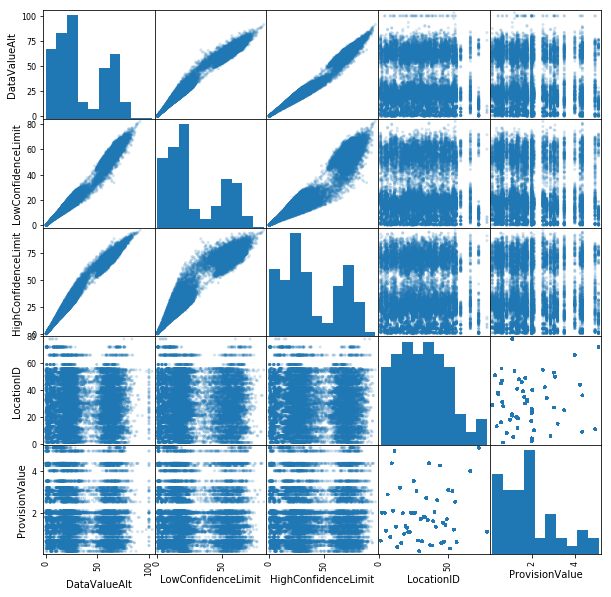

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(merge_tax[['LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'GeoLocation',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1', 'ProvisionValue']], alpha = 0.2, figsize=(10, 10))

In [28]:
#new df with list of questions. drop questions that don't contain any values
tax_q = merge_tax['Question'].unique()
index = np.argwhere(tax_q=='Amount of tobacco product excise tax')
tax_q = np.delete(tax_q, index)
index = np.argwhere(tax_q=='States that allow stronger local tobacco control and prevention laws')
tax_q = np.delete(tax_q, index)
index = np.argwhere(tax_q=='States with strong polices that require retail licenses to sell tobacco products')
tax_q = np.delete(tax_q, index)
tax_q

array(['Current smoking among adults aged >= 18 years',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke',
       'Quit attempts in the past year among current smokers',
       'Current cigarette smoking among women aged 18-44 years',
       'Current smokeless tobacco use among adults aged >= 18 years',
       'Current cigarette smoking among youth',
       'Current smokeless tobacco use among youth',
       'Secondary schools that have a comprehensive tobacco-free school policy in place',
       'Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars',
       'Sale of cigarette packs',
       'Percent tobacco revenue to fund at CDC recommended level',
       'Cigarette smoking before pregnancy'], dtype=object)

In [29]:
import matplotlib.pyplot as plt


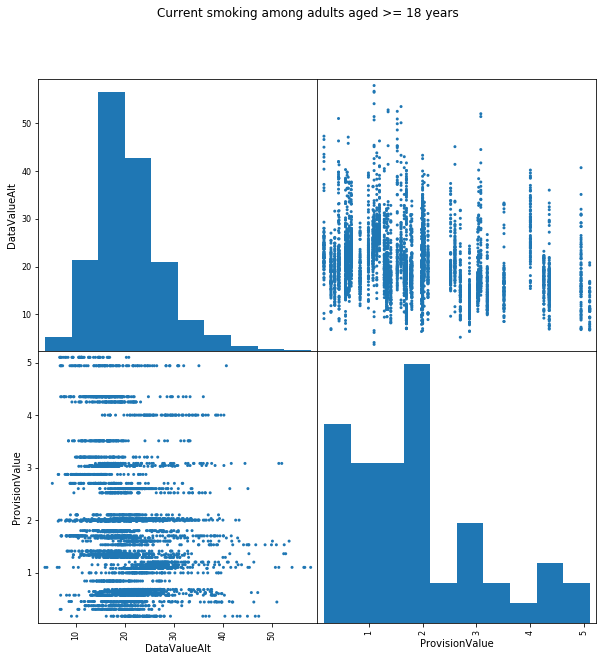

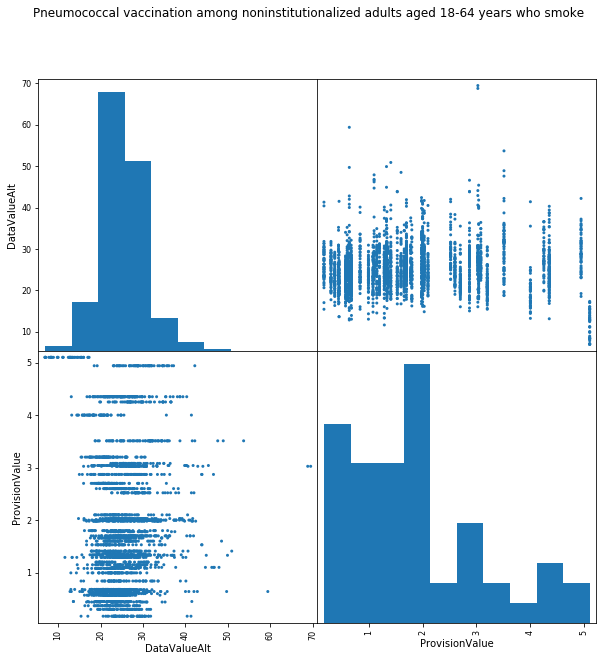

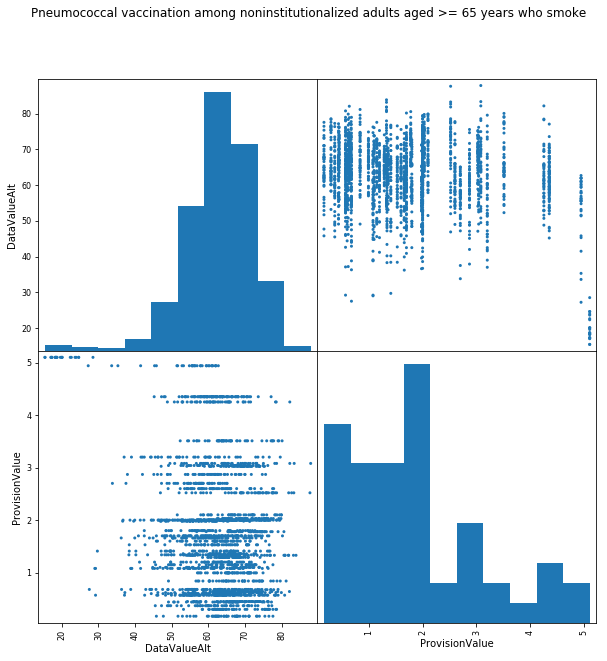

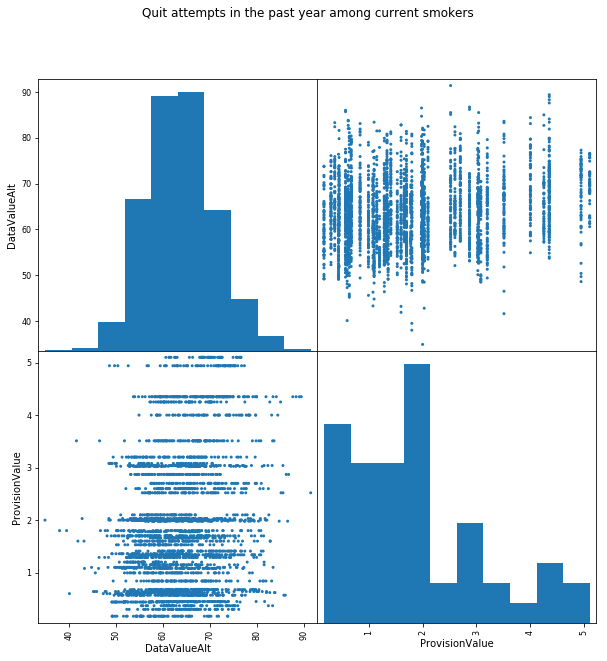

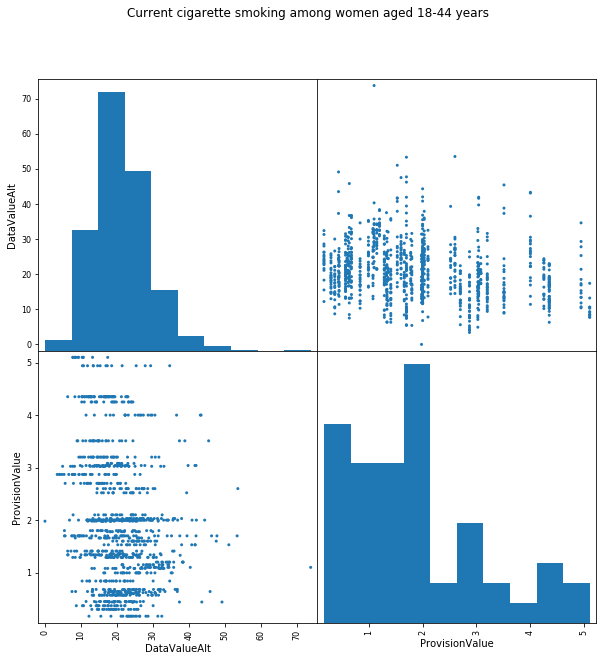

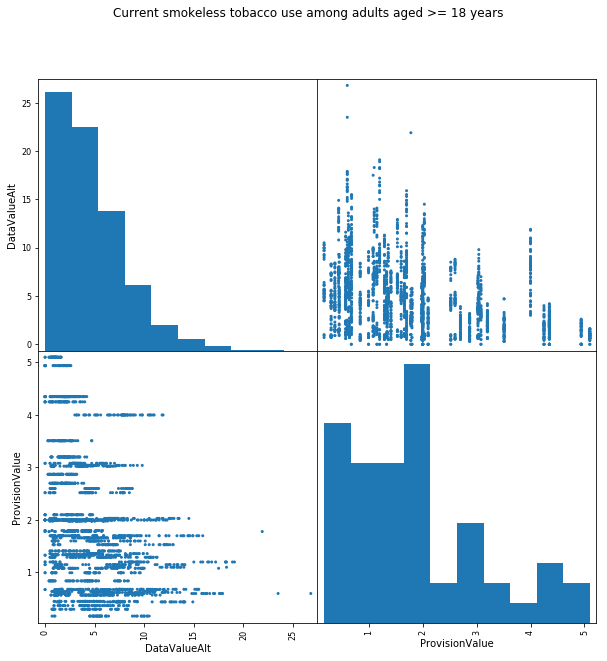

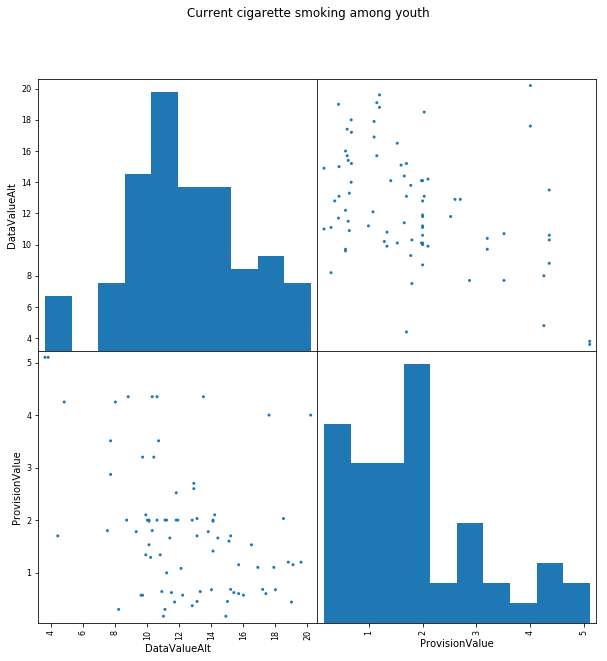

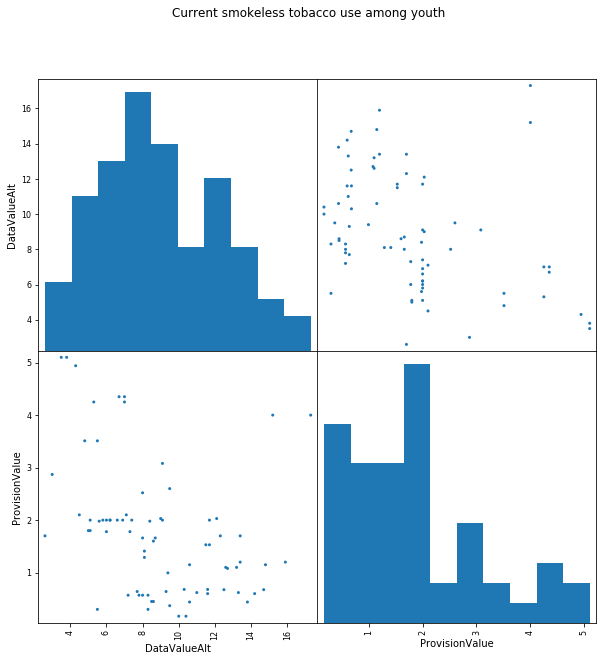

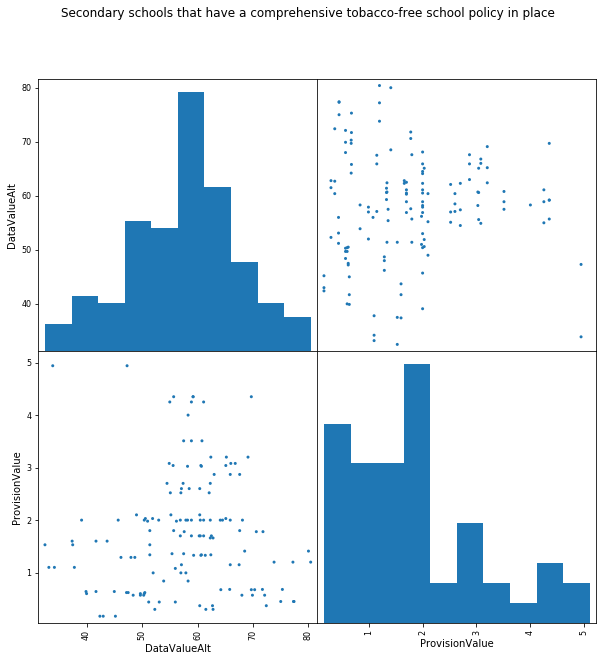

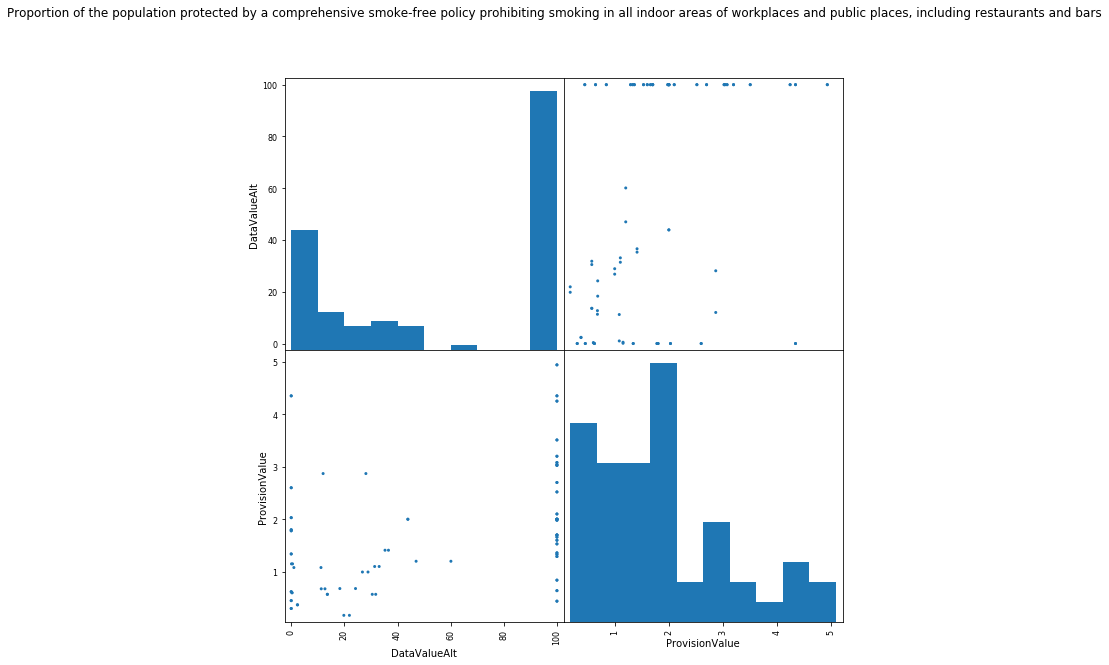

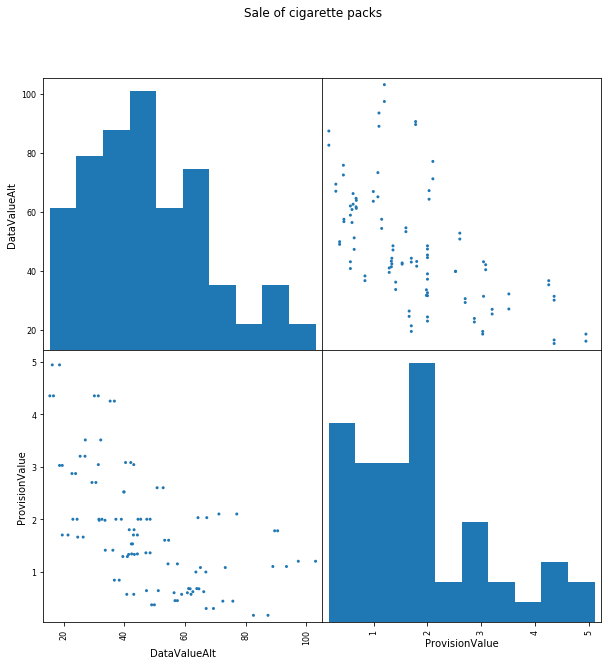

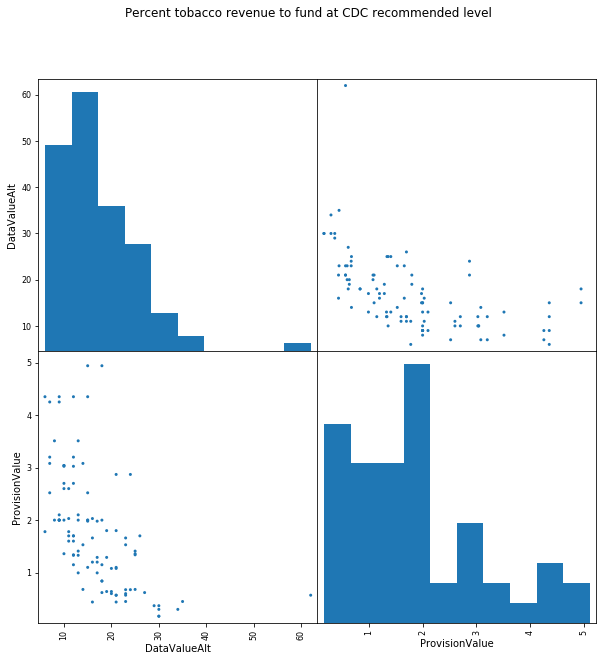

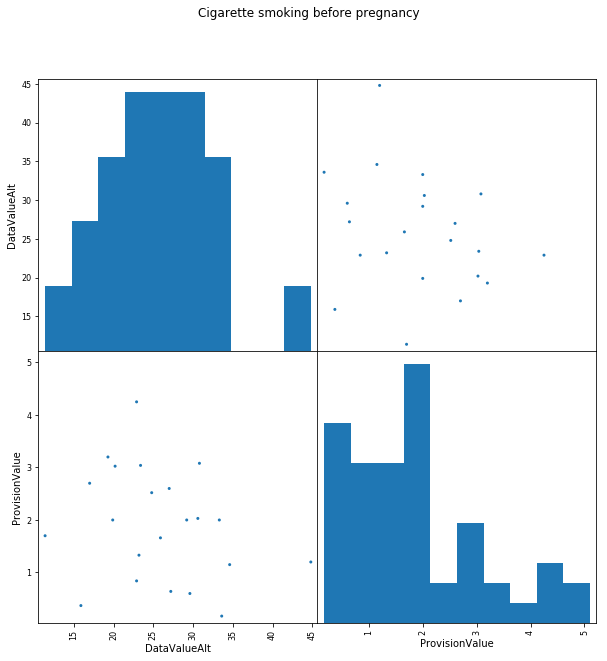

In [30]:
#loop through questions and plot datavalue vs tobacco tax rate
for i in tax_q:
    result = merge_tax.loc[(merge_tax['Question'] == str(i))]
    scatter_matrix(result[[
 'DataValueAlt',
 'ProvisionValue']], alpha = 1.0, figsize=(10, 10))
    plt.suptitle(i)
    plt.show()

There are some correlation between the US-CDI data and the cigarette tax per pack where we can do more analysis on.

In [31]:
alcohol_df.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,16.9,16.9,*,...,18.0,Overall,Overall,NaN,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR
1,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,13,13.0,NaN,...,14.1,Overall,Overall,"(32.84057112200048, -86.63186076199969)",1,ALC,ALC2_2,CRDPREV,OVERALL,OVR
2,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,18.2,18.2,NaN,...,20.6,Overall,Overall,"(64.84507995700051, -147.72205903599973)",2,ALC,ALC2_2,CRDPREV,OVERALL,OVR
3,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,15.6,15.6,NaN,...,16.9,Overall,Overall,"(34.865970280000454, -111.76381127699972)",4,ALC,ALC2_2,CRDPREV,OVERALL,OVR
4,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,15,15.0,NaN,...,17.2,Overall,Overall,"(34.74865012400045, -92.27449074299966)",5,ALC,ALC2_2,CRDPREV,OVERALL,OVR


In [32]:
alc_q2_df = alcohol_df[alcohol_df['Question'] == 'Per capita alcohol consumption among persons aged >= 14 years']
alc_q2_df.shape

(110, 22)

In [33]:
alc_q2_df['DataValueAlt'].unique()

array([2.79, 1.99, 1.79, 2.37, 2.3 , 2.76, 2.36, 3.85, 3.59, 2.59, 1.96,
       2.58, 2.35, 2.82, 2.32, 1.97, 1.92, 1.88, 2.55, 2.15, 2.71, 2.8 ,
       2.4 , 2.23, 3.08, 2.06, 3.41, 2.29, 4.55, 2.42, 3.35, 2.19, 2.03,
       1.91, 2.69, 2.34, 2.39, 2.28, 2.73, 2.01, 1.37, 2.11, 3.05, 2.26,
       2.97, 1.78, 3.  , 2.  , 1.8 , 2.2 , 2.7 , 3.8 , 3.1 , 2.5 ,  nan,
       2.9 , 4.4 , 3.3 , 2.1 , 1.9 , 2.6 , 1.4 ])

The 'nan' values in the dataframe are for US territories (e.g. Puerto Rico, Guam) and will be removed in this case. These values aren't true NaN values, but are actually strings, so they have to be treated as such. Considering this is a small subset of non-US states as well, we chose to just remove these data points from the dataframe entirely.

In [34]:
alc_q2_df = alc_q2_df.dropna(subset = ['DataValue', 'DataValueAlt'])

In [35]:
alc_q2_df

,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
261305,AK,Alaska,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.79,2.79,NaN,...,NaN,Overall,Overall,"(64.84507995700051, -147.72205903599973)",2,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261306,AL,Alabama,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,1.99,1.99,NaN,...,NaN,Overall,Overall,"(32.84057112200048, -86.63186076199969)",1,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261307,AR,Arkansas,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,1.79,1.79,NaN,...,NaN,Overall,Overall,"(34.74865012400045, -92.27449074299966)",5,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261308,AZ,Arizona,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.37,2.37,NaN,...,NaN,Overall,Overall,"(34.865970280000454, -111.76381127699972)",4,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261309,CA,California,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.3,2.30,NaN,...,NaN,Overall,Overall,"(37.63864012300047, -120.99999953799971)",6,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261310,CO,Colorado,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.76,2.76,NaN,...,NaN,Overall,Overall,"(38.843840757000464, -106.13361092099967)",8,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261311,CT,Connecticut,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.36,2.36,NaN,...,NaN,Overall,Overall,"(41.56266102000046, -72.64984095199964)",9,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261312,DC,District of Columbia,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,3.85,3.85,NaN,...,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261313,DE,Delaware,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,3.59,3.59,NaN,...,NaN,Overall,Overall,"(39.008830667000495, -75.57774116799965)",10,ALC,ALC7_0,PERCAPALC,OVERALL,OVR
261314,FL,Florida,AEDS,Alcohol,Per capita alcohol consumption among persons a...,gallons,Per capita alcohol consumption,2.59,2.59,NaN,...,NaN,Overall,Overall,"(28.932040377000476, -81.92896053899966)",12,ALC,ALC7_0,PERCAPALC,OVERALL,OVR


The map is working using plotly, a semi-convenient visualization library that we had to sign up with and get our own API key for use. The credentials will be included either in the Final Project file, or a separate credentials file that will be referenced. 

In [36]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

alc_q2_df['text'] = alcohol_df['LocationDesc'] + '<br>' +\
    'DataValueAlt '+ str(alcohol_df['DataValueAlt'])

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = alc_q2_df['LocationAbbr'],
        z = alc_q2_df['DataValueAlt'].astype(float),
        locationmode = 'USA-states',
        text = alc_q2_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Placeholder for Units"
        )
    ) ]

layout = dict(
        title = 'US CDI Alcohol Results<br>(Hover for breakdown)',
        geo = dict(
            scope = 'usa',
            projection = dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data = data, layout = layout )

py.iplot( fig, filename = 'd3-cloropleth-map' )

c:\users\kevin.wood\appdata\local\programs\python\python37\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Now, let's do some web scraping using BeautifulSoup and the requests library to read in some income data we found on Wikipedia to do some analysis on.

In [70]:
from bs4 import BeautifulSoup
import requests

# Commented out after initial run. File now in directory.
# income_html = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income').text
# with open("income.html", "w", encoding='utf-8') as file:
#     file.write(income_html)
with open('income.html', 'r', encoding='utf-8') as html_file:
    income_html = html_file.read()

income_soup = BeautifulSoup(income_html, 'html.parser')
tables = income_soup.find_all('table',{'class':'wikitable sortable'})

# This data is from 2010-2014
median_income = pd.read_html(str(tables))[0]

per_cap_income = pd.read_html(str(tables))[1]

In [71]:
median_income.head()

,Rank,State or territory,2015,2014,2013,2012,2011[n 1]
0,1.0,Maryland,"$75,847","$73,971","$72,483","$71,122","$70,004"
1,2.0,District of Columbia,"$75,628","$71,648","$67,572","$66,583","$63,124"
2,3.0,Hawaii,"$73,486","$69,592","$68,020","$66,259","$61,821"
3,4.0,Alaska,"$73,355","$71,583","$72,237","$67,712","$67,825"
4,5.0,New Jersey,"$72,222","$71,919","$70,165","$69,667","$67,458"


In [72]:
per_cap_income.head()
per_cap_income.describe

<bound method NDFrame.describe of     Rank    State or territory Per capitaincome Medianhouseholdincome  \
0    1.0  District of Columbia          $45,877               $71,648   
1    2.0           Connecticut          $39,373               $70,048   
2    3.0            New Jersey          $37,288               $69,160   
3    4.0         Massachusetts          $36,593               $71,919   
4    5.0              Maryland          $36,338               $73,971   
5    6.0         New Hampshire          $34,691               $66,532   
6    7.0              Virginia          $34,052               $64,902   
7    8.0              New York          $33,095               $58,878   
8    9.0          North Dakota          $33,071               $59,029   
9   10.0                Alaska          $33,062               $71,583   
10  11.0             Minnesota          $32,638               $61,481   
11  12.0              Colorado          $32,357               $61,303   
12  13.0         

#### We also read in some national park data below but have commented out the write to file snippet after its initial creation. We wrote to a file to make sure the structure of the html was preserved despite changes to Wikipedia sites. This html had some oddities in it that we had to clean out manually. We'll be making the 'Area (2017)[2]' column a numeric later, but are leaving the 'acres' for reference for now.

In [67]:
# Commented out after initial run. File now in directory.
# np_html = requests.get('https://en.wikipedia.org/wiki/List_of_areas_in_the_United_States_National_Park_System').text
# with open("national_parks.html", "w", encoding='utf-8') as file:
#     file.write(np_html)
with open('national_parks.html', 'r', encoding='utf-8') as html_file:
    np_html = html_file.read()

np_soup = BeautifulSoup(np_html, 'html.parser')
tables = np_soup.find_all('table',{'class':'sortable wikitable'})
np_df = pd.read_html(str(tables))[0]

In [73]:
np_df.head()

,Name,Location,Year established,Area (2017)[2]
0,Acadia National Park,Maine,1919,"49,057.26 acres"
1,National Park of American Samoa,American Samoa,1988,"8,256.67 acres"
2,Arches National Park,Utah,1971,"76,678.98 acres"
3,Badlands National Park,South Dakota,1978,"242,755.94 acres"
4,Big Bend National Park,Texas,1944,"801,163.21 acres"


### Final Questions for Analysis

#### - Is there a strong correlation between cigarette tax and smoking among any particular observed population?

#### -Why is alcohol consumption so much higher in New Hampshire and Nevada? Is it actually that high?

#### -Is state-by-state obesity correlated with any variables outside this dataset? (e.g. food consumption per capita, fast food restaurants per capita, sleep, recreation designated areas/parks?)